In [78]:
from lib import transient
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as cmx
%matplotlib inline

In [9]:
tr = transient.Transient()

Imported RuCl3_HighFluence_10.0_K.txt as RuCl3__10.0_K
Imported RuCl3_HighFluence_100.0_K.txt as RuCl3__100.0_K
Imported RuCl3_HighFluence_12.0_K.txt as RuCl3__12.0_K
Imported RuCl3_HighFluence_120.0_K.txt as RuCl3__120.0_K
Imported RuCl3_HighFluence_14.0_K.txt as RuCl3__14.0_K
Imported RuCl3_HighFluence_140.0_K.txt as RuCl3__140.0_K
Imported RuCl3_HighFluence_16.0_K.txt as RuCl3__16.0_K
Imported RuCl3_HighFluence_160.0_K.txt as RuCl3__160.0_K
Imported RuCl3_HighFluence_18.0_K.txt as RuCl3__18.0_K
Imported RuCl3_HighFluence_180.0_K.txt as RuCl3__180.0_K
Imported RuCl3_HighFluence_20.0_K.txt as RuCl3__20.0_K
Imported RuCl3_HighFluence_200.0_K.txt as RuCl3__200.0_K
Imported RuCl3_HighFluence_22.0_K.txt as RuCl3__22.0_K
Imported RuCl3_HighFluence_220.0_K.txt as RuCl3__220.0_K
Imported RuCl3_HighFluence_24.0_K.txt as RuCl3__24.0_K
Imported RuCl3_HighFluence_240.0_K.txt as RuCl3__240.0_K
Imported RuCl3_HighFluence_26.0_K.txt as RuCl3__26.0_K
Imported RuCl3_HighFluence_28.0_K.txt as RuCl3__2

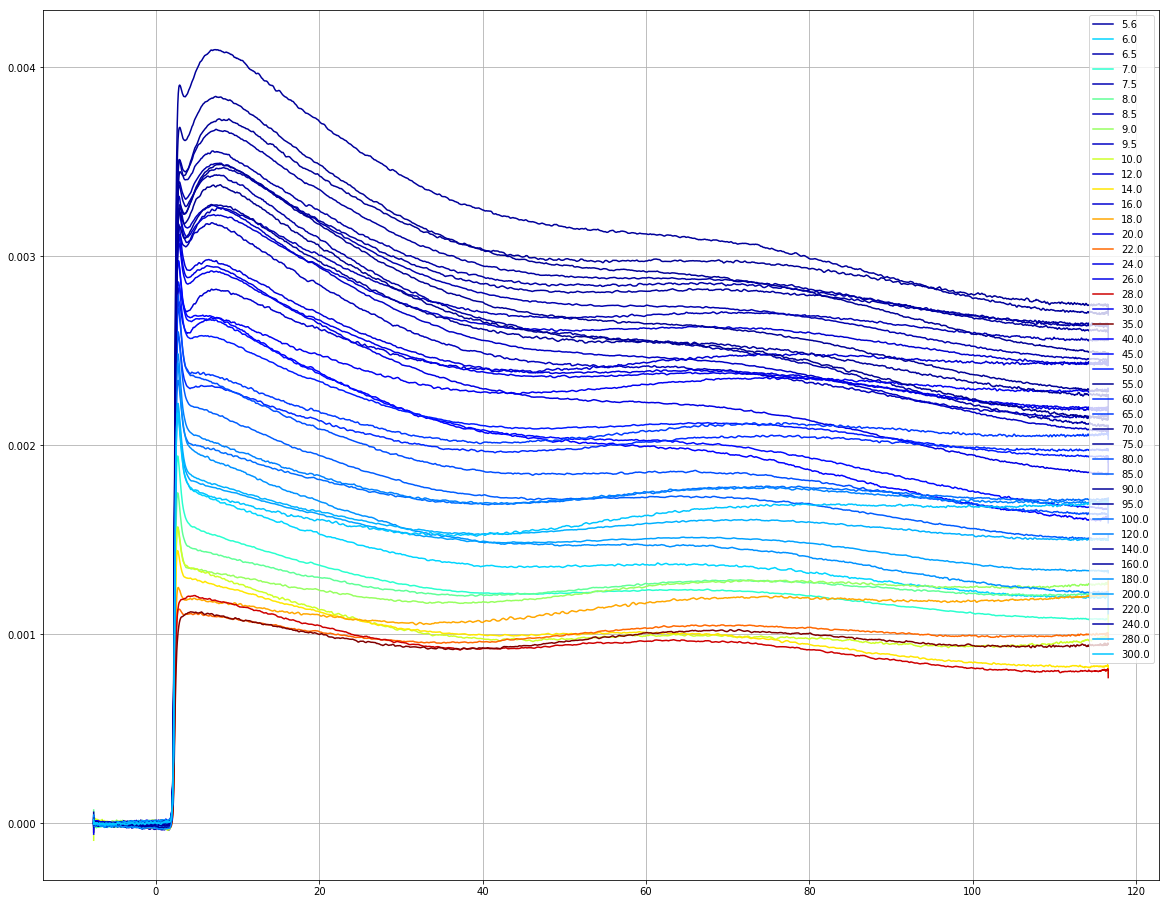

In [91]:
del tr
tr = transient.Transient()
filepath = 'E:/data/RuCl3/High Fluence_temperature/'
files = os.listdir(filepath)
ax = []
trs = []
k_parameters = []
cutFreq = 0.05 # THz
t0 = 115
key_parameter = 'temperature'
description = ''
for i in range(len(files)):
    tr = transient.Transient()
    tr.import_file(filepath + files[i],key_parameter = key_parameter, description=description)
    tr.crop_time_scale()
    tr.shift_time(t0)
    tr.filter_low_pass(cutFreq)
    tr.flip_trace()
    tr.remove_DC_offset()
    tr.flip_time()
    k_parameters.append(tr.key_parameter_value)
    trs.append(tr)
print(len(trs))
k_parameters.sort()

fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
jet = cm = plt.get_cmap('jet') 

cNorm  = colors.Normalize(vmin=0, vmax=max(k_parameters))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
lines = []
for idx in range(len(trs)):
    colorVal = scalarMap.to_rgba(trs[idx].key_parameter_value)
    retLine, = ax.plot(trs[idx].time, trs[idx].trace, color=colorVal)
    #retLine.set_color()
    lines.append(retLine)
ax.legend(lines, k_parameters, loc='upper right')
ax.grid()
# |plt.show()

In [12]:
tr.date

'2017-04-20-16.09.40'

In [13]:
tr.raw_time

array([  -0.81865948,   -0.82156379,   -0.82445452, ...,  128.97869492,
        128.97332208,  128.96793582])

In [26]:
tr.filter_low_pass(cutHigh=0.05)

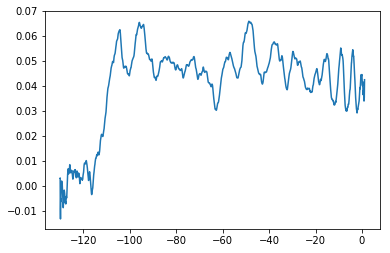

In [32]:
figure = plt.figure('testplot')
ax1 = plt.plot(tr.time,tr.trace)
plt.show()